# Exploratory Data Analysis (EDA)

https://www.kaggle.com/esratmaria/petfinder-pawpularity-prediction-eda

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',None)

In [7]:
# Averaged-data (DAISEE)
def load_data(datafile):
    df = pd.read_csv(datafile)
    df = df.drop(df.columns[0], axis=1)
    return df

# path_av = ('../../Dataset/DAiSEE/OpenFace_2.2.0_win_x64/processed/csv/labels/')
path_av = '../../Dataset/DAiSEE/CSV_Mediapipe/'
df_train_av = load_data(path_av+'average_train_Mediapipe.csv')
df_val_av = load_data(path_av+'average_val_Mediapipe.csv')
df_test_av = load_data(path_av+'average_test_Mediapipe.csv')

train = pd.concat([df_train_av,df_val_av],axis=0,ignore_index=True)
test = df_test_av

print(train.head(2))

         x1        y1        z1        v1        x2        y2        z2  \
0  0.579905  0.764062 -1.025070  0.999752  0.600768  0.704560 -0.992600   
1  0.569563  0.772870 -1.122043  0.999594  0.590441  0.713146 -1.102587   

         v2        x3        y3  ...  v499      x500      y500      z500  \
0  0.999642  0.615805  0.704411  ...   0.0  0.633684  0.703341  0.013373   
1  0.999693  0.605241  0.710449  ...   0.0  0.624941  0.703120  0.008968   

   v500      x501      y501      z501  v501  Engagement  
0   0.0  0.637919  0.699040  0.013707   0.0         2.0  
1   0.0  0.629089  0.698559  0.008983   0.0         2.0  

[2 rows x 2005 columns]


In [8]:
print('train info: ', train.info())
print('test info: ', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Columns: 2005 entries, x1 to Engagement
dtypes: float64(2005)
memory usage: 109.7 MB
train info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Columns: 2005 entries, x1 to Engagement
dtypes: float64(2005)
memory usage: 27.3 MB
test info:  None


In [9]:
print('train describe: ', train.describe())
print('\n')
print('test describe: ', test.describe())

train describe:                  x1           y1           z1           v1           x2  \
count  7169.000000  7169.000000  7169.000000  7169.000000  7169.000000   
mean      0.539229     0.618191    -1.288284     0.999432     0.567057   
std       0.065575     0.110514     0.427530     0.000837     0.065244   
min       0.176940     0.190168    -3.471673     0.988842     0.181811   
25%       0.507665     0.539567    -1.483286     0.999351     0.536566   
50%       0.538383     0.622119    -1.217633     0.999674     0.566109   
75%       0.577247     0.694683    -1.005127     0.999846     0.604202   
max       0.830236     0.955965    -0.052946     0.999998     0.870474   

                y2           z2           v2           x3           y3  ...  \
count  7169.000000  7169.000000  7169.000000  7169.000000  7169.000000  ...   
mean      0.549210    -1.256927     0.999337     0.586064     0.548335  ...   
std       0.113726     0.435599     0.000699     0.065365     0.114177  ...   


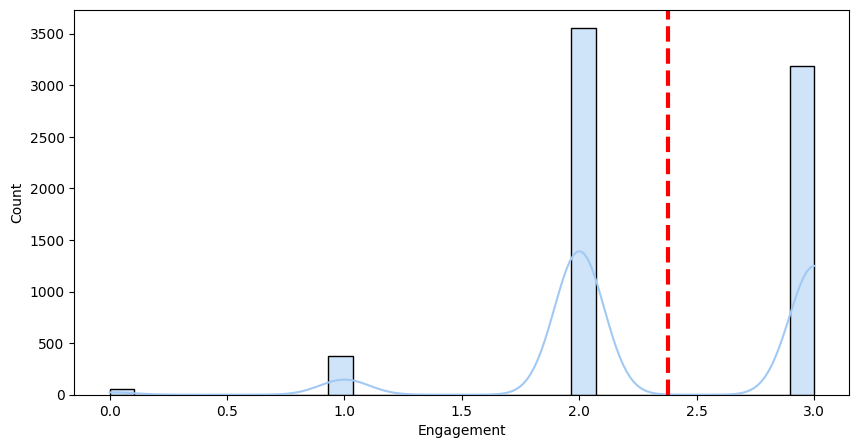

In [10]:
# Distribution

plt.figure(figsize=(10,5))
sns.set_palette("pastel")
sns.histplot(data=train, x='Engagement', kde= True)
plt.axvline(train['Engagement'].mean(), c = 'red', ls = '--', lw=3)

0       False
1       False
2       False
3       False
4       False
        ...  
7165    False
7166    False
7167    False
7168    False
7169    False
Length: 7170, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7165    False
7166    False
7167    False
7168    False
7169    False
Length: 7170, dtype: bool


<AxesSubplot:>

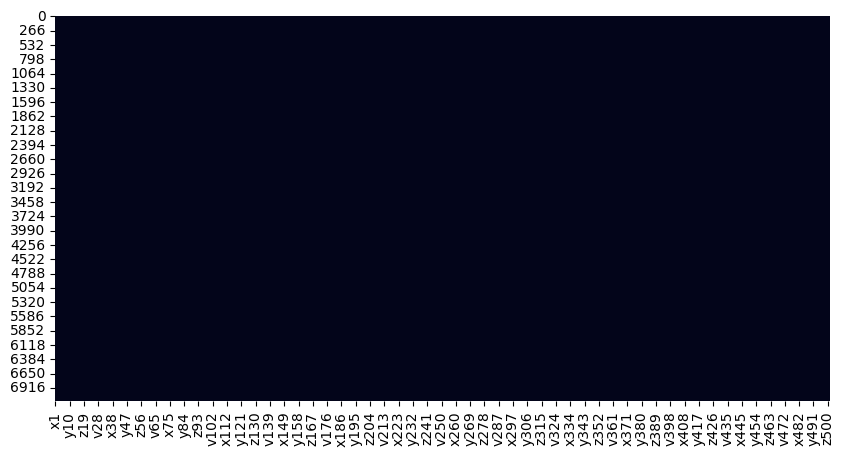

In [20]:
# Check for NULL

print(train.isna().any(axis=1))
print(train.isnull().any(axis=1))
plt.figure(figsize=(10,5))
sns.heatmap(train.isna(), cbar=False)
sns.heatmap(train.isnull(), cbar=False)

In [13]:
# Checking for correlation

sns.clustermap(train.corr())

<AxesSubplot:>

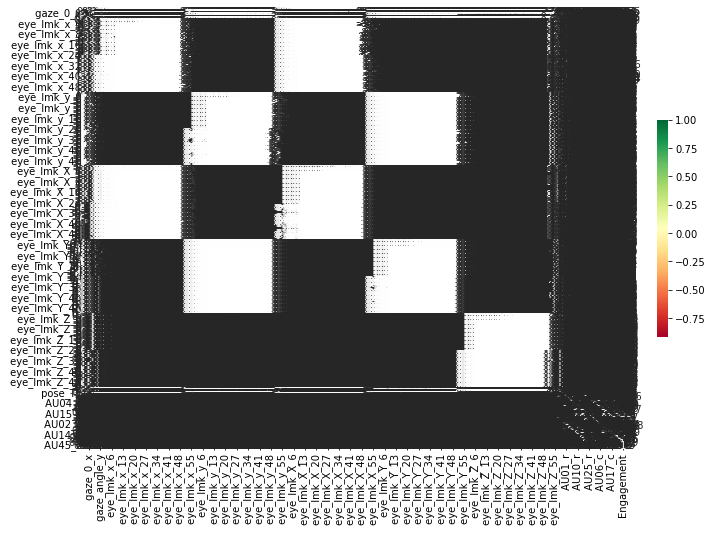

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), linewidths=0.5, linecolor='white', annot=True, cmap='RdYlGn', cbar_kws={'shrink':0.5})

In [9]:
print(train.corr("pearson")['Engagement'].sort_values(ascending=False))
print("")
print(train.corr("kendall")['Engagement'].sort_values(ascending=False))

Engagement       1.000000
 AU14_c          0.052509
 eye_lmk_y_43    0.046459
 eye_lmk_y_44    0.046358
 eye_lmk_y_42    0.046333
                   ...   
 AU20_r         -0.134450
 AU23_r         -0.143359
 AU17_r         -0.151668
 AU15_r         -0.165118
 AU26_r         -0.167889
Name: Engagement, Length: 330, dtype: float64

Engagement       1.000000
 AU14_c          0.058604
 eye_lmk_y_42    0.044931
 eye_lmk_y_43    0.044765
 eye_lmk_y_44    0.044399
                   ...   
 AU20_c         -0.116498
 AU26_r         -0.121286
 AU23_r         -0.121421
 AU17_r         -0.126862
 AU15_r         -0.129279
Name: Engagement, Length: 330, dtype: float64


In [10]:
# sns.pairplot(train)

IndexError: index 11 is out of bounds for axis 0 with size 11

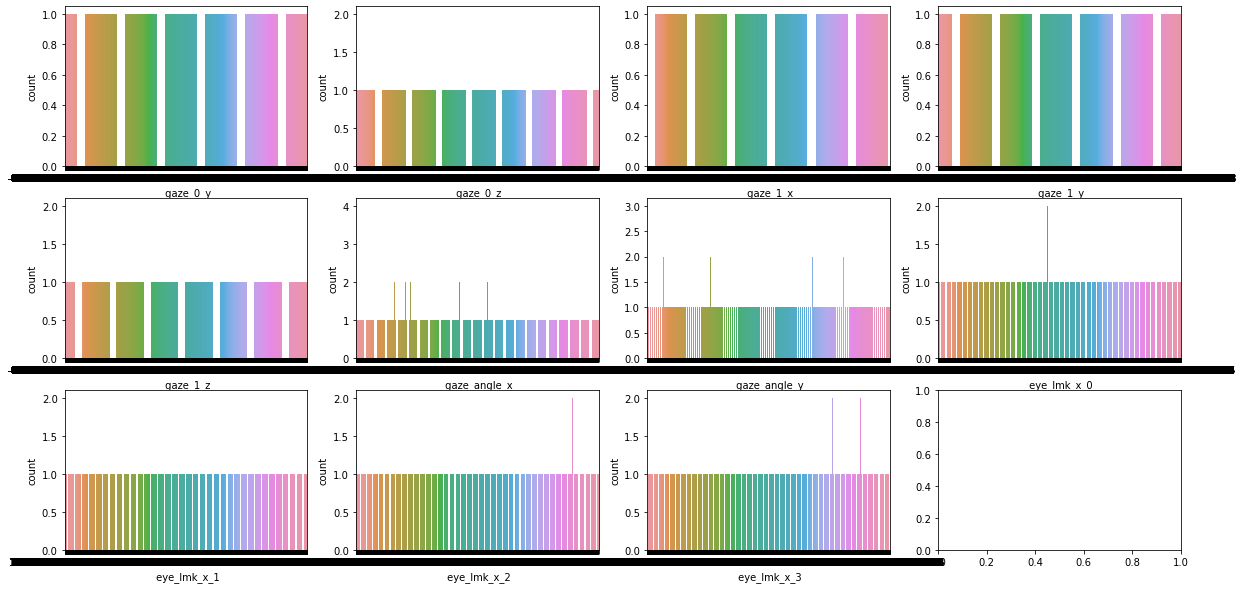

In [12]:
plt.figure(figsize=(20,10))

for i in range(train.shape[1]-2):
    plt.subplot(3,4,i+1)
    sns.countplot(data=train, x=train.columns[1:12][i])
